In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install spacy=="3.0"
!python -m spacy download pl_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.7 MB 15.6 MB/s 
     |████████████████████████████████| 457 kB 53.9 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 9.1 MB 39.3 MB/s 
     |████████████████████████████████| 660 kB 56.2 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found exi

In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import spacy
from tqdm.notebook import tqdm
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pickle

In [3]:
tqdm.pandas()

In [4]:
train = pd.read_csv("/content/gdrive/My Drive/HACKATHON/train.csv")

In [5]:
test = pd.read_csv("/content/gdrive/My Drive/HACKATHON/test.csv")

In [6]:
train.columns

Index(['id', 'created_at_first', 'category', 'is_business', 'district_id',
       'city_id', 'region_id', 'description', 'params', 'title', 'price'],
      dtype='object')

In [7]:
train.head()

,id,created_at_first,category,is_business,district_id,city_id,region_id,description,params,title,price
0,325017,2018-10-06 12:20:48,Mieszkanie na sprzedaż,1,12867.0,210,14,<p><br/>Oferuję na sprzedaż&nbsp;<strong>miesz...,price[currency]<=>PLN<br>m<=>72.14<br>rooms_nu...,Nowa inwestycja na Dajtkach - mieszkania od 70...,389556
1,513427,2019-02-18 12:17:51,Mieszkanie na sprzedaż,1,NaN,3614,15,<p>[b]Plewiska lokal 2-poziomowy w zabudowie s...,price[currency]<=>PLN<br>m<=>95<br>rooms_num<=...,Plewiska mieszkanie 2-poziomowe z ogródkiem,500000
2,824979,2019-03-21 17:31:09,Mieszkanie na sprzedaż,1,3434.0,204,10,"<p>Polecamy trzypokojowe, dwustronne i bardzo ...",price[currency]<=>PLN<br>m<=>58.9<br>rooms_num...,Mieszkanie z potencjałem / Zielone Wzgórza,238000
3,400727,2018-11-28 23:50:45,Mieszkanie na sprzedaż,1,87.0,1,15,<p><br/>Kupując z pośrednikiem - kupujesz bezp...,price[currency]<=>PLN<br>m<=>45<br>rooms_num<=...,"Poznań, Łazarz, mieszkanie 2 pokojowe",209000
4,298324,2019-01-22 21:22:42,Dom na sprzedaż,0,NaN,11879,7,<p>Nowy dom wolnostojący o powierzchni 195 m<P...,price[currency]<=>PLN<br>terrain_area<=>3201<b...,Piękny dom na wsi w okolicy Nowego Dworu Maz.,729000


In [8]:
descriptions = train["description"]
titles = train["title"]
prices = train["price"]

In [9]:
descriptions_test = test["description"]
titles_test = test["title"]

In [ ]:
stop = pd.read_csv("/content/gdrive/My Drive/Hackathon/stopwords.txt", header=None, squeeze=True).values.tolist()
regex = r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
nlp = spacy.load("pl_core_news_lg")

In [ ]:
def clean_text(raw_text):
  if pd.isna(raw_text):
    return []
  clean_text = BeautifulSoup(raw_text, "lxml").text
  clean_text = clean_text.lower()
  clean_text = re.sub(regex, "", clean_text)
  doc = nlp(clean_text)
  tokens = [token for token in doc if token.text not in stop]
  lemmas = [token.lemma_ for token in tokens]
  return lemmas

In [ ]:
cleaned_descriptions = descriptions.progress_apply(clean_text)

  0%|          | 0/4861 [00:00<?, ?it/s]

In [ ]:
cleaned_descriptions.head()

0    [oferować, sprzedamieszkanie, nowy, inwestycja...
1    [bplewiska, lokal, 2poziomowy, zabudowa, szere...
2    [polecamytrzypokojowe, dwustronny, ustawny, mi...
3    [kupujc, porednikiem,  , kupować, bezpiecznie,...
4    [nowy, dom, wolnostojcy, powierzchnia, 195, mo...
Name: description, dtype: object

In [ ]:
cleaned_descriptions.to_csv("/content/gdrive/My Drive/Hackathon/train_descriptions_cleaned.csv")

In [ ]:
cleaned_descriptions_test = descriptions_test.progress_apply(clean_text)

  0%|          | 0/5426 [00:00<?, ?it/s]

In [ ]:
cleaned_descriptions_test.head()

0    [mieszkanie, dwupokojowe, powierzchnia, 4128, ...
1    [3, pokój, ogrdek, balkon, 2, miejsce, postojo...
2    [sprzedam, mieszkanie, pooone, spokojny, osied...
3    [polecać, sprzeday, wolnostojcy, dom, pooony, ...
4    [krzyk, praktyczny, iustawne, mieszkanie0, pro...
Name: description, dtype: object

In [ ]:
cleaned_descriptions_test.to_csv("/content/gdrive/My Drive/Hackathon/test_descriptions_cleaned.csv")

In [ ]:
# Prepare BOW representation with most common words in descriptions to find most important words

In [ ]:
words, counts = np.unique(cleaned_descriptions.explode(), return_counts=True)
unique_description_words = {word: count for word, count in zip(words, counts)}
unique_description_words = sorted(unique_description_words.items(), key=lambda x: x[1], reverse=True)
unique_description_words = [(word, count) for word, count in unique_description_words if word.isalpha()]

In [ ]:
unique_description_words

[('mieszkanie', 9470),
 ('si', 9329),
 ('powierzchnia', 4839),
 ('dom', 4716),
 ('oferta', 4645),
 ('budynek', 4576),
 ('kuchnia', 4410),
 ('pokój', 3768),
 ('znajdywać', 3707),
 ('miejsce', 3632),
 ('salon', 3385),
 ('nieruchomoci', 3076),
 ('sypialnia', 3035),
 ('okno', 2998),
 ('azienka', 2829),
 ('osiedle', 2580),
 ('centrum', 2555),
 ('nowy', 2432),
 ('ok', 2255),
 ('m', 2240),
 ('balkon', 2101),
 ('cena', 2063),
 ('piter', 2025),
 ('ogrzewanie', 2016),
 ('inwestycja', 1943),
 ('pokj', 1931),
 ('zabudowa', 1859),
 ('lokalizacja', 1790),
 ('parter', 1766),
 ('okolica', 1730),
 ('pow', 1726),
 ('s', 1719),
 ('dobry', 1716),
 ('strona', 1710),
 ('lokal', 1704),
 ('skada', 1640),
 ('wc', 1635),
 ('taras', 1626),
 ('miejski', 1617),
 ('teren', 1560),
 ('moliwo', 1536),
 ('kuchenny', 1526),
 ('woda', 1499),
 ('pomieszczenie', 1480),
 ('wysoki', 1440),
 ('aneks', 1429),
 ('azienki', 1415),
 ('zapraszać', 1398),
 ('przestronny', 1391),
 ('stanowić', 1386),
 ('sklep', 1376),
 ('rwnie', 135

In [ ]:
most_common_words_number = 1000
most_common_words = unique_description_words[:most_common_words_number]

In [ ]:
word_idx_mapper = {word: idx for idx, (word, _) in enumerate(most_common_words)}

In [ ]:
def map_words_to_bow(words, word_idx_mapper):
  words = [word_idx_mapper[word] for word in words if word in word_idx_mapper.keys()]
  bow = np.zeros(len(word_idx_mapper))
  for word_idx in words:
    bow[word_idx] = 1
  return bow

In [ ]:
descriptions_bow = cleaned_descriptions.progress_apply(lambda x: map_words_to_bow(x, word_idx_mapper))

  0%|          | 0/4861 [00:00<?, ?it/s]

In [ ]:
descriptions_bow = np.vstack(np.array(descriptions_bow))

In [ ]:
prices = np.array(prices)

In [ ]:
descriptions_bow = descriptions_bow[~np.isnan(prices)]
prices = prices[~np.isnan(prices)]

In [ ]:
descriptions_bow

array([[1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
prices

array([ 389556.,  500000.,  238000., ...,  183000., 2300000.,  290000.])

In [ ]:
# Train regressor tree
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(descriptions_bow, prices)

DecisionTreeRegressor()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 <a list of 100 Text major ticklabel objects>)

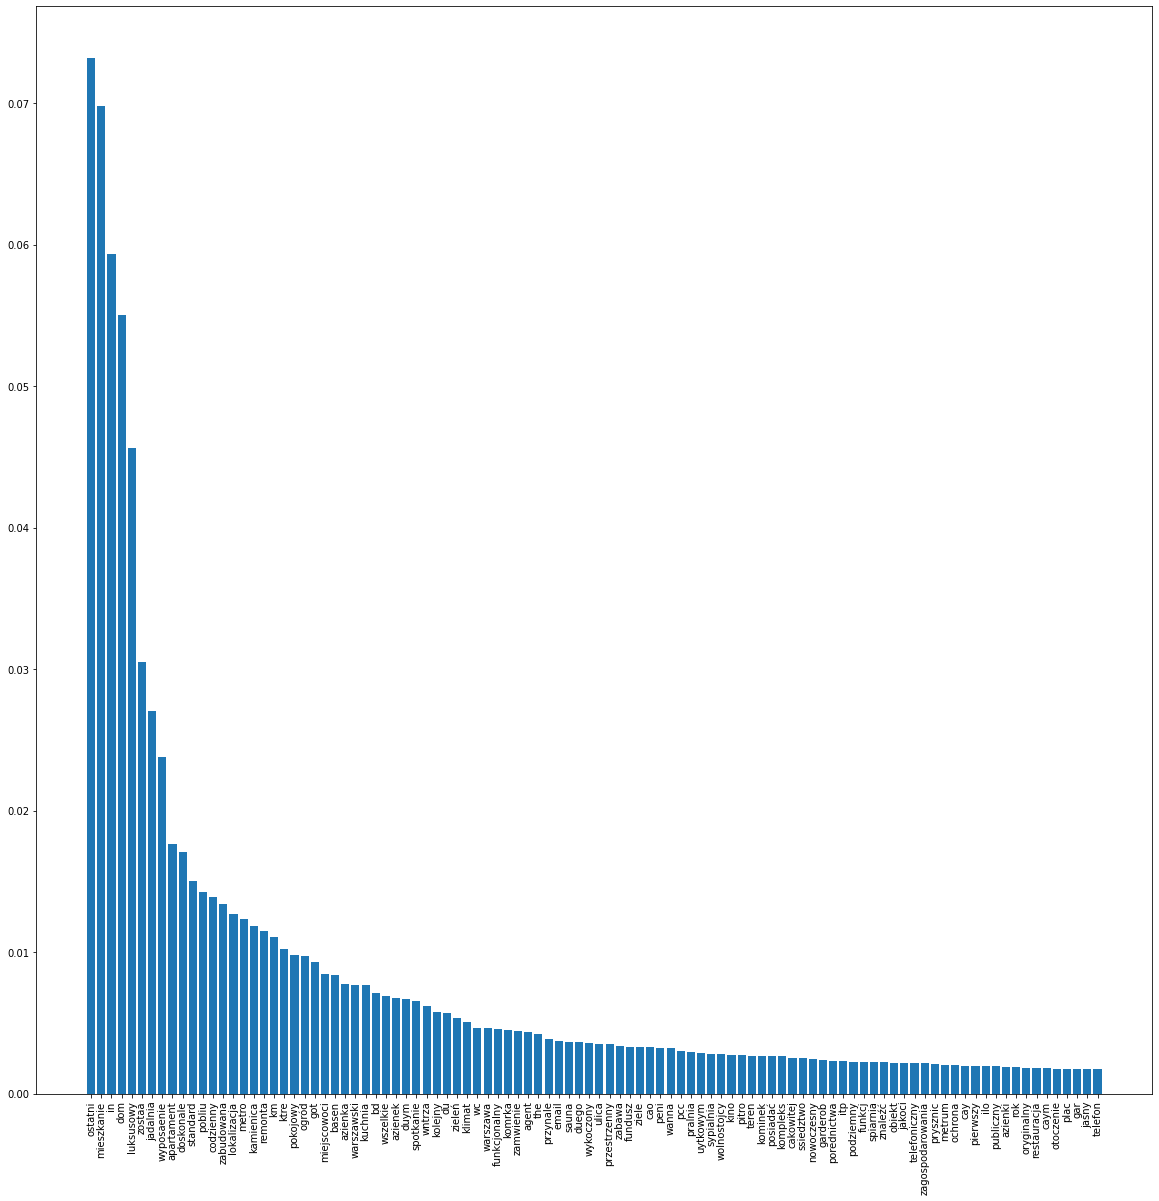

In [ ]:
# Get feature importances
most_important_features_number = 100
fis = regressor_tree.feature_importances_
feature_importances = {word: importance for word, importance in zip(word_idx_mapper.keys(), fis)}
feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)[:most_important_features_number])
plt.figure(figsize=(20, 20))
plt.bar(feature_importances.keys(), feature_importances.values())
plt.xticks(rotation = 90)

In [ ]:
# Prepare BOW representation with most important words in descriptions for train and test sets

In [ ]:
most_important_word_idx_mapper = {word: idx for idx, word in enumerate(list(feature_importances.keys()))}

In [ ]:
train_descriptions_bow = cleaned_descriptions.progress_apply(lambda x: map_words_to_bow(x, most_important_word_idx_mapper))

  0%|          | 0/4861 [00:00<?, ?it/s]

In [ ]:
train_descriptions_bow = pd.DataFrame(np.vstack(train_descriptions_bow))

In [ ]:
train_descriptions_bow

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4857,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
train_descriptions_bow.to_csv("/content/gdrive/My Drive/Hackathon/train_encoded_descriptions.csv")

In [ ]:
test_descriptions_bow = cleaned_descriptions_test.progress_apply(lambda x: map_words_to_bow(x, most_important_word_idx_mapper))

  0%|          | 0/5426 [00:00<?, ?it/s]

In [ ]:
test_descriptions_bow = pd.DataFrame(np.vstack(test_descriptions_bow))

In [ ]:
test_descriptions_bow

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_descriptions_bow.to_csv("/content/gdrive/My Drive/Hackathon/test_encoded_descriptions.csv")

In [ ]:
with open('/content/gdrive/My Drive/Hackathon/word_index_mapper.pkl', 'wb') as f:
    pickle.dump(most_important_word_idx_mapper, f)

In [ ]:
# Extract params from string to DataFrame

In [10]:
train_params = train["params"]
test_params = test["params"]

In [11]:
def extract_params(params):
  if pd.isna(params):
    return {}
  res = {}
  all_params = params.split("<br>")
  params_values = [params.split("<=>") for params in all_params if params and params != "<br"]
  for param, param_value in params_values:
    if "<->" not in param_value:
      res[param] = param_value
    else:
      inner = param_value.split("<->")
      for i in inner:
        res[i] = 1
  return res

In [12]:
train_params_dicts = list(train_params.progress_apply(extract_params))

  0%|          | 0/832011 [00:00<?, ?it/s]

In [13]:
test_params_dicts = list(test_params.progress_apply(extract_params))

  0%|          | 0/138136 [00:00<?, ?it/s]

In [14]:
train_params_df = pd.DataFrame(train_params_dicts)

In [15]:
test_params_df = pd.DataFrame(test_params_dicts)

In [17]:
test_params_df

,price[currency],m,rooms_num,market,building_type,floor_no,building_floors_num,building_material,windows_type,heating,...,electric,geothermal,solar_collector,urban,sea,heat_pump,oil,dirt,hedge,biomass
0,PLN,41.28,2,primary,block,floor_3,3,brick,plastic,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLN,75,3,secondary,block,ground_floor,3,brick,plastic,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PLN,91.7,4,secondary,,floor_2,2,other,,gas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PLN,246,4,secondary,detached,NaN,NaN,brick,plastic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PLN,91,4,primary,apartment,floor_1,4,,plastic,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138131,PLN,149,4,primary,semi_detached,NaN,NaN,,plastic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138132,PLN,275,7,secondary,detached,NaN,NaN,other,wooden,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138133,PLN,85,4,secondary,tenement,floor_3,4,brick,wooden,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138134,PLN,55.77,3,primary,block,ground_floor,3,other,plastic,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_params_df

,price[currency],m,rooms_num,market,building_type,floor_no,building_floors_num,building_material,windows_type,heating,...,type,dimensions,fence,gastronomy,hotel,asphalt_access,parking,deposit,deposit[currency],rent_to_students
0,PLN,72.14,4,secondary,,floor_1,1,,plastic,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLN,95,4,secondary,ribbon,ground_floor,1,brick,plastic,gas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PLN,58.9,3,secondary,block,floor_3,4,concrete_plate,wooden,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PLN,45,2,secondary,,ground_floor,,,plastic,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PLN,195,6,secondary,detached,NaN,NaN,brick,plastic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832006,PLN,39.45,2,primary,block,ground_floor,3,brick,plastic,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832007,PLN,48,3,secondary,block,floor_8,10,,,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832008,PLN,56.42,3,primary,apartment,ground_floor,3,breezeblock,plastic,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832009,PLN,51.85,2,primary,apartment,ground_floor,3,brick,plastic,urban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_params_df.describe()

,cable-television,internet,phone,closed_area,roller_shutters,dishwasher,fridge,oven,stove,washing_machine,...,sea,geothermal,urban,other,biomass,elevator,gastronomy,hotel,asphalt_access,parking
count,234047.0,297889.0,199031.0,112981.0,25825.0,34170.0,52678.0,56993.0,63484.0,36861.0,...,1101.0,141.0,924.0,1374.0,474.0,2.0,1.0,1.0,1.0,1.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# train_params_df.to_csv("/content/gdrive/My Drive/Hackathon/train_params.csv")

In [ ]:
# test_params_df.to_csv("/content/gdrive/My Drive/Hackathon/test_params.csv")

In [24]:
train.columns

Index(['id', 'created_at_first', 'category', 'is_business', 'district_id',
       'city_id', 'region_id', 'description', 'params', 'title', 'price'],
      dtype='object')

In [25]:
train

,id,created_at_first,category,is_business,district_id,city_id,region_id,description,params,title,price
0,325017,2018-10-06 12:20:48,Mieszkanie na sprzedaż,1,12867.0,210,14,<p><br/>Oferuję na sprzedaż&nbsp;<strong>miesz...,price[currency]<=>PLN<br>m<=>72.14<br>rooms_nu...,Nowa inwestycja na Dajtkach - mieszkania od 70...,389556
1,513427,2019-02-18 12:17:51,Mieszkanie na sprzedaż,1,NaN,3614,15,<p>[b]Plewiska lokal 2-poziomowy w zabudowie s...,price[currency]<=>PLN<br>m<=>95<br>rooms_num<=...,Plewiska mieszkanie 2-poziomowe z ogródkiem,500000
2,824979,2019-03-21 17:31:09,Mieszkanie na sprzedaż,1,3434.0,204,10,"<p>Polecamy trzypokojowe, dwustronne i bardzo ...",price[currency]<=>PLN<br>m<=>58.9<br>rooms_num...,Mieszkanie z potencjałem / Zielone Wzgórza,238000
3,400727,2018-11-28 23:50:45,Mieszkanie na sprzedaż,1,87.0,1,15,<p><br/>Kupując z pośrednikiem - kupujesz bezp...,price[currency]<=>PLN<br>m<=>45<br>rooms_num<=...,"Poznań, Łazarz, mieszkanie 2 pokojowe",209000
4,298324,2019-01-22 21:22:42,Dom na sprzedaż,0,NaN,11879,7,<p>Nowy dom wolnostojący o powierzchni 195 m<P...,price[currency]<=>PLN<br>terrain_area<=>3201<b...,Piękny dom na wsi w okolicy Nowego Dworu Maz.,729000
...,...,...,...,...,...,...,...,...,...,...,...
832006,932054,2018-09-01 08:32:13,Mieszkanie na sprzedaż,1,NaN,569,6,<p>Przytulne mieszkanie na parterze w bloku mi...,price[currency]<=>PLN<br>m<=>39.45<br>rooms_nu...,NaN,218948
832007,457415,2018-03-08 22:41:41,Mieszkanie na sprzedaż,1,220356.0,208,11,<p></p><p>ATRAKCYJNE MIESZKANIE W SOPOCIE !</p...,price[currency]<=>PLN<br>m<=>48<br>rooms_num<=...,Mieszkanie - Sopot Kamienny Potok,600000
832008,468577,2018-09-14 17:00:05,Mieszkanie na sprzedaż,1,1269.0,165,12,"<p>Projekt ,,Akant 2"" z istotnymi zmianami to...",price[currency]<=>PLN<br>m<=>56.42<br>rooms_nu...,Apartament bezczynszowy z windą i piwnicą!!!!!...,259532
832009,429669,2018-08-30 14:02:53,Mieszkanie na sprzedaż,1,126.0,213,16,<p>Nowa inwestycja powstaje w nalpopularniejsz...,price[currency]<=>PLN<br>m<=>51.85<br>rooms_nu...,"Apartamenty na Pogodnie, najlepsza lokalizacja!",363400
